<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao


# Qiskit Aer: Simuladores

---








Cargamos las credenciales de nuestra cuenta e importamos las librerias iniciales

In [5]:
from qiskit import IBMQ
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-01-17 11:23:15,809: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.providers.aer import Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

## Backends de simulacion

Ahora veremos como importamos el Backend del simulador [Qiskit Aer](https://qiskit.org/ecosystem/aer/index.html) y lo utilizaremos para ejecutar circuitos de Qiskit Terra ideales, sin ruido.

El provider de Aer provider contiene una variedad de backends de simulacion para poder usar diferentes métodos de simulacion.

Los backends que hay accesibles para el sistema actual en el que estamos, pueden verse utilizando la funcion `Aer.backends()`

#### EJERCICIO

Siguiendo las instrucciones del [tutorial](https://qiskit.org/ecosystem/aer/tutorials/1_aer_provider.html) de la documentacion de las librerías `Aer`, obten los backends de ejecucion que tenemos disponibles en nuestro entorno.

In [8]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

El backend principal de simulacion es el `AerSimulator`. Podemos crear una instancia de backend de simulacion para correr nuestros circuitos utilizando `Aer.get_backend('aer_simulator')`.

In [9]:
simulator = Aer.get_backend('aer_simulator')

La configuracion por defecto de un objeto backend simulador `AerSimulator` es la de simular un dispositico real libre de ruido.

Si un objeto `QuantumCircuit` contiene medidas y se corre en este backend, devolverá un diccionario que contiene los resultados de las medidas. Las medidas son los valores finales que se almacenan en el registro de bits clásico del circuito.

El circuito puede contener puertas, medidas, condicionales y otras instrucciones que soporte el simulador.

### EJERCICIO

Siguiendo con el tutorial, construimos un circuito y lo ejecutamos en el simulador. Obten el diccionario de conteos de los estados medidos, el histograma y tambien los resultados de cada medida.

La operacion básica de correr un circuito devuelve un diccionario de los resultados de las medidas sobre el estado final del circuito.

Aqui veamos como corremos un circuito que contiene el estado de Bell de 2-qubits $\left|\psi\right\rangle = \frac{1}{2}\left(\left|00\right\rangle + \left|11 \right\rangle\right)$  y mide los resultados con la funcion `plot_histogram`

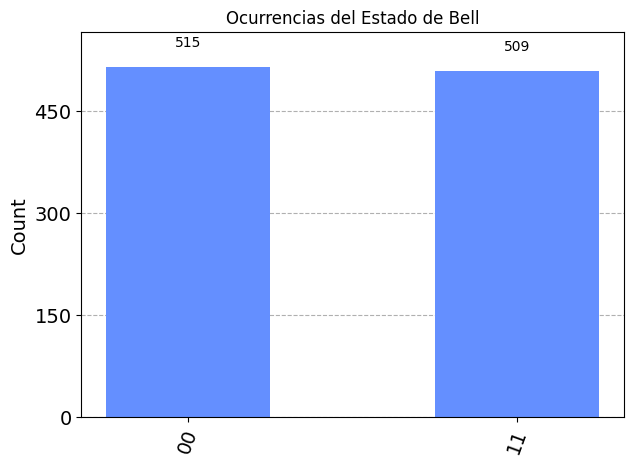

In [10]:
# Crear el circuito
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Usar transpile como simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Lo ejecutamos y obtenemos el número de ocurrencias
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Ocurrencias del Estado de Bell')

Para obtener los resultados de las medidas de cada ejecucion (shot) utilizamos el parámetro `memory=True` en la ejecucion

In [11]:
# Correr y obtener la memoria con las medidas de cada shot individual
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '11', '00', '00', '00', '11', '00', '00', '11', '00']


## Métodos de Simulacion

El simulador `AerSimulator` soporta una variedad de metodos de simulacion, cada uno de ellos soporta diferentes instrucciones.

El método de simulacion puede seleccionarse con la instruccion `simulator.set_option(method=value)` o puede seleccionarse un simulador con el metodo pre-seleccionado de los disponibles directamente en `Aer.get_backend`.

Cuando simulamos circuitos ideales, cambiar el metodo de simulacion `statevector`, `density_matrix` y `matrix_product_state` no debe de cambiar los resultados de las medidas del circuito simulado.

Cada uno de estos metodos determina un representacion interna del vector de estados del circuito y de los algoritmos utilizados en las operaciones cuánticas. Cada metodo tiene sus ventajas y desventajas y elegir el metodo mas apropiado es una cuestion de investigacion.

### EJERCICIO

Prueba las diferentes opciones de simulacion que tienen las librerías Aer.

Tomando el circuito anterior realiza una ejecucion para cada tipo de opcion de simulador y recogie los resultados para representarlos conjuntamente en un histograma, como ejecuciones diferentes con `plot_histogram`

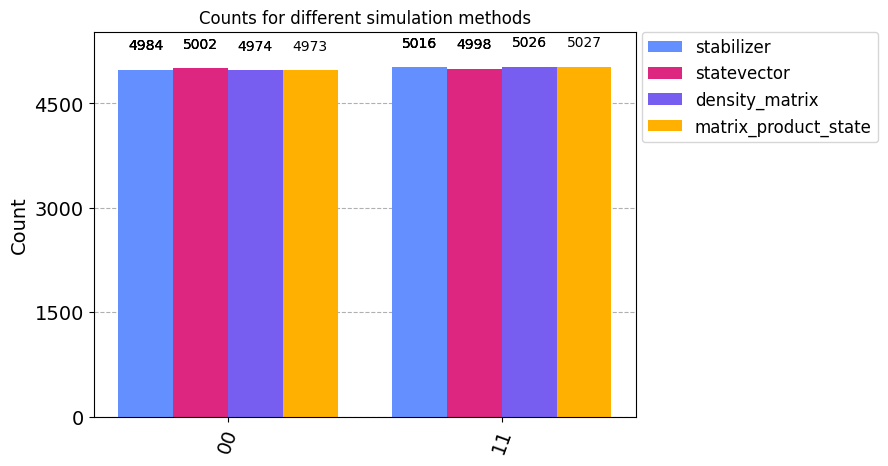

In [12]:
# Incrementar los shots para reducir la varianza de la muestra
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

Cada simulador tiene un funcionamiento por defecto, pero tambien se puede especificar un metodo con la propiedad `method` al crear el backend o con la opcion `method`del backend.

## Instrucciones del simulador segun su tipo

### Guardar el vector de estados

El estado del simulador puede guardarse en una variedad de formatos en función de las instrucciones que soporta ese tipo de simulador



| Método del Circuito | Descripcion | Métodos soportados |
|---------------------|-------------|------------------|
| `save_state` | Guardar el estado del simulador en el formato nativo de simulacion | All |
| `save_statevector` | Guardar el estado del simulador como statevector | `"automatic"`, `"statevector"`, `"matrix_product_state"`, `"extended_stabilizer"`|
| `save_stabilizer` | Guardar el estado del simulador como Clifford stabilizer | `"automatic"`, `"stabilizer"`|
| `save_density_matrix` | Guardar el estado del simulador como density matrix | `"automatic"`, `"statevector"`, `"matrix_product_state"`, `"density_matrix"` |
| `save_matrix_product_state` | Guardar el estado del simulador como un producto tensorial de matrices | `"automatic"`, `"matrix_product_state"`|
| `save_unitary` | Guardar el estado del simulador como unitary matrix del circuito | `"automatic"`, `"unitary"`|
| `save_superop` | Guardar el estado del simulador  como superoperator matrix  del circuito | `"automatic"`, `"superop"`|

Nota: estas instrucciones se soportan solamante en el simulador Aer y daran error si se ejectan sobre hardware de dispositivos reales.

### Guardar el estado final __statevector__

Para guardar el estado final de una simulacion podemos utilizar el metodo `save_statevector` de la clase `QuantumCircuit`. Es importante notar que esta instruccion debe de aplicarse antes de las medidas para evitar que el estado colapse y perdamos la informacion de superposicion y fase.

### EJERCICIO

Crea un circuito cuantico y en lugar de medir su resultado guardalo en un objeto de tipo `StateVector()`

Visualizalo con las funciones `array_to_latex()` y `plot_bloch_multivector()`

In [13]:
# Construir un circuito sin medidas



# correr el circuito y visualizar el statevector



In [14]:
#visualizar el vector de estado resultado en latex
from qiskit.visualization import array_to_latex


In [15]:
#visualizar el vector de estado resultado con plot_bloch_multivector
from qiskit.visualization import plot_bloch_multivector


### Guardar la matriz unitaria del circuito

Para guardar a matriz unitaria del circuito en una simulacion podemos utilizar el metodo `save_unitary` de la clase `QuantumCircuit`. Es importante notar que esta instruccion no puede contener ninguna medida o resets ya que estas operaciones no son unitarias y no se soportan en este método.

In [16]:
# Construir un circuito sin medidas



# correr el circuito y visualizar la matriz unitaria resultado

In [17]:
#visualizar el operador con con state_city


### Guardar multiples estados

Podemos ejecutar instrucciones para guardar el vector de estados o la matriz unitaria en ese punto del circuito. Es importante notar que hay que dar un nombre o etiqueta único `label` a cada objeto que guardamos para no perder los resultados por sobre-escritura

In [18]:
# Construir un circuito sin medidas
steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpilar para el simulador
simulator = Aer.get_backend('aer_simulator')
#circ = transpile(circ, simulator)

# correr el circuito y obtener los datos resultado
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

In [19]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_experiment',
 '_metadata',
 'backend_name',
 'backend_version',
 'data',
 'date',
 'from_dict',
 'get_counts',
 'get_memory',
 'get_statevector',
 'get_unitary',
 'header',
 'job_id',
 'qobj_id',
 'results',
 'status',
 'success',
 'to_dict']

In [20]:
result.data()

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

#### EJERCICIO

inspecciona y representa los resultados obtenidos de la ejecucion anterior:

- el objeto `data`
- los objetos que hay en el iterable `data.items()` 

Y representa cada vector de estados de esta coleccion con `plot_bloch_multivector`

psi_5


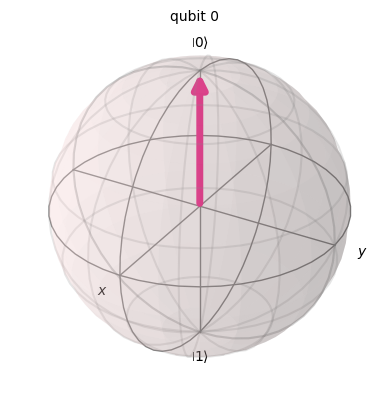

psi_4


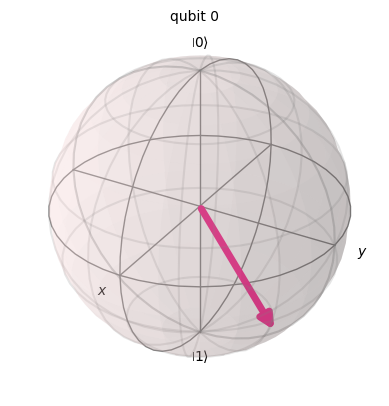

psi_3


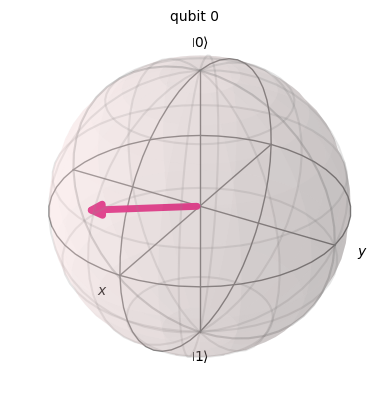

psi_2


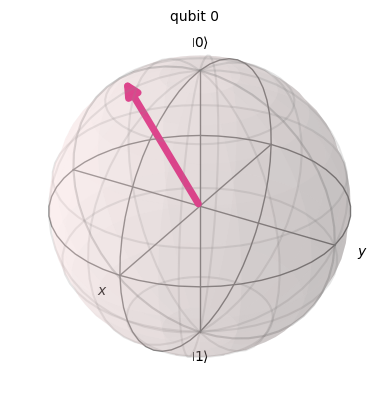

psi_1


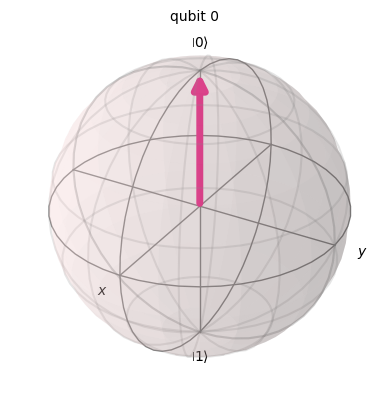

psi_0


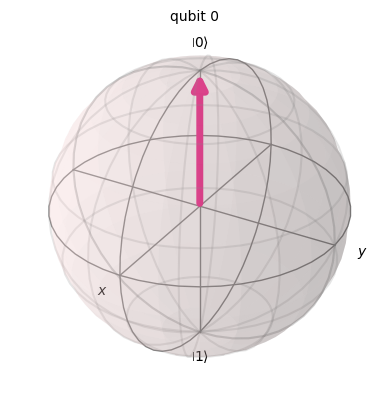

In [21]:
from qiskit.visualization import plot_bloch_multivector

for label,stv in data.items():
    print(label)
    display(plot_bloch_multivector(stv))

### EJERCICIO

Crear un circuito que ilustre el efecto de phase kickback con la puerta CNOT y mostrar a cada paso el vector de estados.

- Paso 1: poner q[0] en el estado |+>
- Paso 2: poner q[1] en el estado |->
- Paso 3: poner puerta CNOT con control en q[0] y target en q[1]


{'phi_3': Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j, -0.5+6.123234e-17j,
               0.5-6.123234e-17j],
             dims=(2, 2)),
 'phi_2': Statevector([ 0.5-6.123234e-17j,  0.5-6.123234e-17j, -0.5+6.123234e-17j,
              -0.5+6.123234e-17j],
             dims=(2, 2)),
 'phi_1': Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
              0.        +0.j],
             dims=(2, 2)),
 'phi_0': Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
             dims=(2, 2))}

phi_3


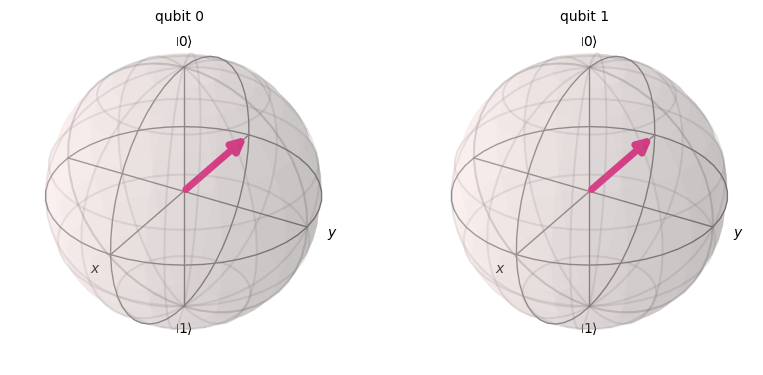

phi_2


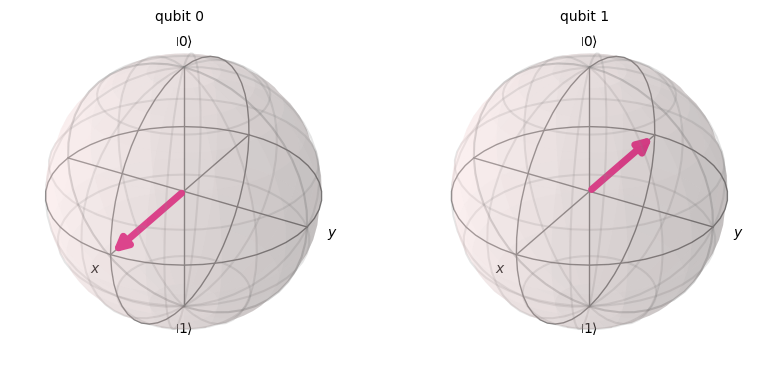

phi_1


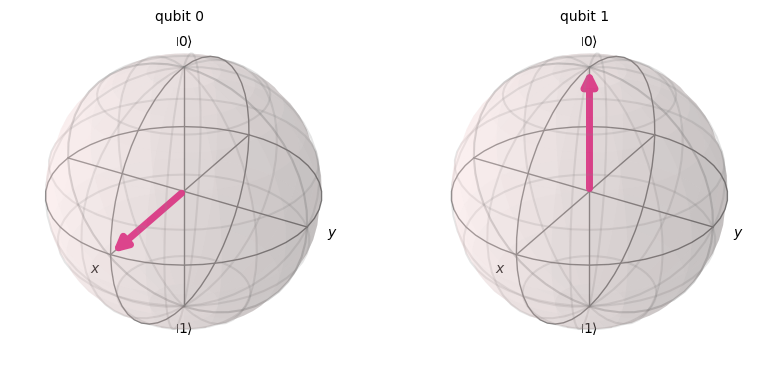

phi_0


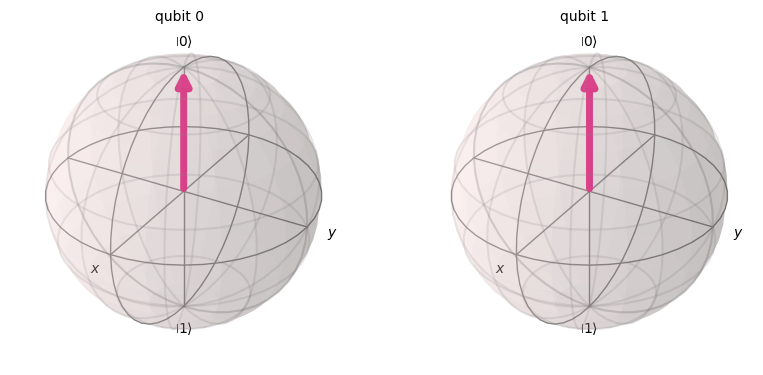

In [26]:
# Creamos el circuito y hacemos cada paso
circuit = QuantumCircuit(2)
circuit.save_statevector(label="phi_0")

circuit.h(0)
circuit.save_statevector(label="phi_1")

circuit.x(1)
circuit.h(1)
circuit.save_statevector(label="phi_2")

circuit.cx(0,1)
circuit.save_statevector(label="phi_3")


# Statevector guardados
result = simulator.run(circuit).result()
data = result.data(0)
display(data)

# Mostramos cada paso
for label,stv in data.items():
    print(label)
    display(plot_bloch_multivector(stv))


## Configurar el simulador a un vector de estados dado


El `AerSimulator` permite configurar el simulador con un estado que deseemos para varios de los metodos de simulacion, con las siguientes instrucciones:

| Método del Circuito | Descripcion | Métodos soportados |
|---------------------|-------------|------------------|
| `set_statevector` | Poner el simulador en un estado específico de statevector | `"automatic"`, `"statevector"`, `"density_matrix"`|
| `set_stabilizer` | Poner el simulador en un estado específico de Clifford stabilizer | `"automatic"`, `"stabilizer"`|
| `set_density_matrix` | Poner el simulador en un estado específico de density matrix | `"automatic"`, `"density_matrix"` |
| `set_unitary` | Poner el simulador en un estado específico de unitary matrix | `"automatic"`, `"unitary"`, `"superop"`|
| `set_superop` | Poner el simulador en un estado específico de superoperator matrix | `"automatic"`, `"superop"`|


**Notas:**
* Estas instrucciones deben de aplicarse a todos los qubits del circuito para que no haya errores
* El estado de entrada debe de ser un vecrtor de estados válido (statevector, density matrix, unitary etc) para que no haya errores
* Estas instrucciones pueden aplicarse en cualquier lugar de un circuito y haran un 'override'  del estado actual al estado especificado. Cualquir valor que estuviese almacenado en el registro clásico (por ejemplo medidas previas) no se verá afectado
* Las instrucciones de configuracion del estado del circuito, solo se soportan en el simulador Aer y daran error si un circuito que las contiene se ejecuta en un backend de dispositivo real como backckend de IBM Quantum devices.

### Configurar un determinado vector de estados

La instruccion `set_statevector` se usa para configurar un determinado `Statevector`. El vector de estados de entrada debe de ser valido ($|\langle\psi|\psi\rangle|=1$) o la instruccion devolverá un error

### EJERCICIO

Crea un vector de estados aleatorio o uno dado con un numero de qubits determinado (2 o 3, por ejemplo) y un circuito sobre el que configuraremos el estado de partida que hemos creado.

Puedes aplicarle algunas operaciones aplicando algunas puertas a sus qubits.

Guarda el estado resultante del circuito y ejecutalo en el simulador Aer.

Muestra por pantalla el vector de estados resultado.

In [ ]:
# Generamos un statevector aleatorio

# Configuramos el estado inicial con el statevector generado


# Ejecutamos y guardamos datos

### Utilizando la instruccion de inicializacion

Tambien es posible inicializar el simulador con un statevector determinado utilizando la instruccion  `initialize`. A diferencia de la instruccion `set_statevector`, esta instruccion tambien se soporta en dispositivos reales.

#### EJERCICIO

Crea un circuito sin ninguna operacion e inicializalo con el vector de estados del ejercicio anterior con la funcion `initialize` y comprueba que el resultado de la ejecucion es el mismo


In [ ]:
# Utilizamos la instruccion de inicializar el circuito
circ = QuantumCircuit(num_qubits)
circ.initialize(psi, range(num_qubits))
circ.save_state()

# Transpilamos para el simulador
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Ejecutamos y guardamos datos
result = simulator.run(circ).result()
result.data(0)

### Configurando una determinada density matrix

La instruccion `set_density_matrix` permite configurar el circuito a un determinado estado de `DensityMatrix`. El valor de matriz de densidad de entrada debe de ser un valor válisdo ($Tr[\rho]=1, \rho \ge 0$)

### EJERCICIO

Crea una matriz de densidad aleatoria como vector de estados de entrada a un circuito de 2 qubits.

Utiliza el metodo `set_density_matrix` de la clase `QuantumCircuit` para inicializar el circuito.
Guarda el estado del circuito con `save_matrix`  en lugar de medirlo, ejecutalo en el simulador y obten los datos de resultado 


In [ ]:
# Generamos una matriz de densidad de un statevector aleatorio
num_qubits = 2
rho = qi.random_density_matrix(2 ** num_qubits, seed=100)
circ = QuantumCircuit(num_qubits)


# Transpilamos para el simulador


# Ejecutamos y guardamos datos

### Configurar un estado determinado Clifford

La instruccion `set_stabilizer` permite configurar el circuito a un determinado estado de `Clifford`. El valor de estado `Clifford` debe de ser un valor válido

### EJERCICIO

Crea un estado de Clifford aleatorio como vector de estados de entrada a un circuito de 2 qubits.

Utiliza el metodo `set_stabilizer` de la clase `QuantumCircuit` para inicializar el circuito.
Guarda el estado del circuito con `save_state`  en lugar de medirlo, ejecutalo en el simulador y obten los datos de resultado 

In [ ]:
# Generamos un random Clifford C
num_qubits = 2
stab = qi.random_clifford(num_qubits, seed=100)

# configuramos el estado inicial a C|0>
circ = QuantumCircuit(num_qubits)


# Transpilamos para el simulador


# Ejecutamos y guardamos datos

### Configurar un circuito a una determinada matríz unitaria

La instruccion  `set_unitary` permite configurar el circuito a una determinad a matriz unitaria `Operator`. El valor de la matriz unitaria debe de dser válido ($U^\dagger U=\mathbb{1}$)

### EJERCICIO

Crea una matriz unitaria aleatoria como matriz de un circuito de 2 qubits.

Utiliza el metodo `set_unitary` de la clase `QuantumCircuit` para inicializar el circuito.
Guarda el estado del circuito con `save_state`  en lugar de medirlo, ejecutalo en el simulador y obten los datos de resultado 

In [ ]:
# Generamos una matriz random unitary
num_qubits = 2
unitary = qi.random_unitary(2 ** num_qubits, seed=100)

# configuramos el estado inicial a la matriz unitary
circ = QuantumCircuit(num_qubits)


# Transpilamos para el simulador


# Ejecutamos y guardamos datos


## Simuladores de backends con diferentes modelos de ruido

Veamos ahora como podemos utilizar el módulo Qiskit Aer noise para generar automáticamente un modelo de ruido de un dispositivo real de IBMQ hardware. Podemos además utilizar este modelo en circuitos cuánticos y estudiar cual será el efecto de los errores antes de correr el circuito en un dispositivo real

Dede de hacerse notar que estos modelos son solo una aproximacion a los errores reales que ocurren en los dispositivos reales y están generados a partir de un numero limitado de parámetros de tasas de error de las puertas del hardware que ocurren. El estudio de errores en hardware cuántico es un tema de investigacion muy activo.

In [1]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import Aer, AerSimulator
from qiskit.tools.visualization import plot_histogram

Los modelos de ruido de Qiskit Aer generan de forma automática un modelo simplificado del ruido que genera un dispositivo real. Este modelo se genera utilizando la informacion de calibracion que se encuentra en las propiedades del dispositivo `BackendProperties` y tiene en cuenta los siguientes aspectos:

* Probabilidad de error en cada puerta base de cada qubit
* El parámetro `gate_length` de cada puerta base de cada qubit
* Las constantes T1 y T2 de los tiempos de relajacion de cada qubit
* La probabilidad de error de lectura de un qubit

Usaremos el ruido de un dispositivo real de IBM Quantum que podemos encontrar en Qiskit Terra. Específicamente el modelo de ruido del dispositivo `ibmq_vigo`. Para más informacion vease los docs en [Fake Providers](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)

In [2]:
from qiskit.providers.fake_provider import FakeVigo

# Tomamos un backend ruidoso ficticio de fake providers
device_backend = FakeVigo()

Para generar un simulador con ruido de un dispositivo real, utilizamos la llamada `from_backend` y creamos un simulador `ibmq_vigo`

In [3]:
sim_vigo = AerSimulator.from_backend(device_backend)

De esta forma guardamos todas las propiedades del dispositivo en el simulador `sim_vigo`, y nos aseguramos de que las mismas puertas base y mapa de acoplamiento entrs los qubits se utilizarán cuando compilemos nuestros circuitos para la simulacion. De esta forma conseguimos emular la misma arquitectura que tenemos al correr el circuito en el dispositivo real.

Además este simulador va a contener el mismo patron de ruido que el dispositivo real y que consiste en:

* Errores de puertas de un qubit (Single-qubit gate errors), que consisten en los errores de depolarizacion de un qubit (single qubit depolarizing error) seguido de un error de relajacion termica del qubit (single qubit thermal relaxation error)
* Errores de puertas de 2-qubits (Two-qubit gate errors), que consisten en los errores de depolarizacion de dos qubits (two-qubit depolarizing error) seguido de los errores de relajacion termica para ambos qubits (single-qubit thermal relaxation errors)
* Errores de lectura de cada qubit (Single-qubit readout errors) para el valor de bit clásico obtenido al realizar la medida sobre un qubit individual

Para los errores de puertas, el parametro de error de relajacion termica se deriva de la funcion `thermal_relaxation_error` del módulo `aer.noise.errors module`, así como de los parámetros T1 y T2 de cada qubit individual y del parámetro `gate_time` de las propiedades del backend del dispositivo.

La probabilidad de error de depolarizacion (depolarizing error) se configura de forma que el promedio de la infidelidad combinada de la puerta (combined average gate infidelity) de el error de depolarizacion siga una relajación termica igual al valor del parámetro de `gate_error` del dispositivo real.

Para los errores de lectura, la probabilidad de que el bit clásico que se obtiene se cambie con respecto al valor teórico viene dada por el parámetro `readout_errors`

Una vez que hemos creado nuestro simulador ruidoso que emula un dispositivo real, vamos a hacer algunas simulaciones.

__Importante__: cuando utilizamos simuladores ruidoses es critico hacer un `transpile` del circuito para el backend del dispositivo utilizado en la simulacion. de esta forma el circuito se mapea de forma correcta el el hardware real emulado.

Para generar un simulador con ruido de un dispositivo real, utilizamos la llamada `from_backend` y creamos un simulador `ibmq_vigo`


In [4]:
sim_vigo = AerSimulator.from_backend(device_backend)

De esta forma guardamos todas las propiedades del dispositivo en el simulador `sim_vigo`, y nos aseguramos de que las mismas puertas base y mapa de acoplamiento entrs los qubits se utilizarán cuando compilemos nuestros circuitos para la simulacion. De esta forma conseguimos emular la misma arquitectura que tenemos al correr el circuito en el dispositivo real.

Además este simulador va a contener el mismo patron de ruido que el dispositivo real y que consiste en:

* Errores de puertas de un qubit (Single-qubit gate errors), que consisten en los errores de depolarizacion de un qubit (single qubit depolarizing error) seguido de un error de relajacion termica del qubit (single qubit thermal relaxation error)
* Errores de puertas de 2-qubits (Two-qubit gate errors), que consisten en los errores de depolarizacion de dos qubits (two-qubit depolarizing error) seguido de los errores de relajacion termica para ambos qubits (single-qubit thermal relaxation errors)
* Errores de lectura de cada qubit (Single-qubit readout errors) para el valor de bit clásico obtenido al realizar la medida sobre un qubit individual

Para los errores de puertas, el parametro de error de relajacion termica se deriva de la funcion `thermal_relaxation_error` del módulo `aer.noise.errors module`, así como de los parámetros T1 y T2 de cada qubit individual y del parámetro `gate_time` de las propiedades del backend del dispositivo.

La probabilidad de error de depolarizacion (depolarizing error) se configura de forma que el promedio de la infidelidad combinada de la puerta (combined average gate infidelity) de el error de depolarizacion siga una relajación termica igual al valor del parámetro de `gate_error` del dispositivo real.

Para los errores de lectura, la probabilidad de que el bit clásico que se obtiene se cambie con respecto al valor teórico viene dada por el parámetro `readout_errors`

Una vez que hemos creado nuestro simulador ruidoso que emula un dispositivo real, vamos a hacer algunas simulaciones.

Importante: cuando utilizamos simuladores ruidoses es critico hacer un `transpile` del circuito para el backend del dispositivo utilizado en la simulacion. de esta forma el circuito se mapea de forma correcta el el hardware real emulado.

#### EJERCICIO

Construye un circuito que genera el estado GHZ $\frac{1}{\sqrt{2}} (|000> + |111>)$

Nos servira para comparar la salida de un dispositivo real con la salida de un circuito que tiene este modelo de ruido simulado con Qiskit Aer AerSimulator.

Antes de corrrer el circuito con ruido o en un dispositivo real veamos cual es la salida ideal sin ruido

Ejecuta el circuito que genera el estado GHZ en el simulador con ruido